In [1]:
import sys
import os

# Add the src folder to the path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [2]:
from SWIM import WaterBalanceModule
import pandas as pd

In [3]:
y1,x1 = [7.134245418549412, -75.66251481454375] # Ituango Dam 
y2,x2 = [6.166183453891647, -75.60315908625327] # Medellin River (Envigado)

In [4]:
swim = WaterBalanceModule()

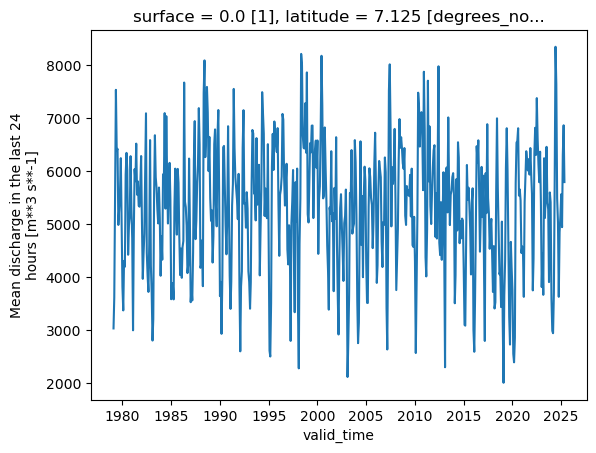

In [5]:
points = [(x1, y1), (x2, y2)]
netcdf_path = '../data/discharge/discharge.nc'

discharges = swim.extract_monthly_discharge_from_netcdf(
    nc_path=netcdf_path,
    points=points,
)
# Ejemplo: acceder al primer punto
monthly_q1 = discharges['discharge_1']
monthly_q2 = discharges['discharge_2']
monthly_q1.plot()

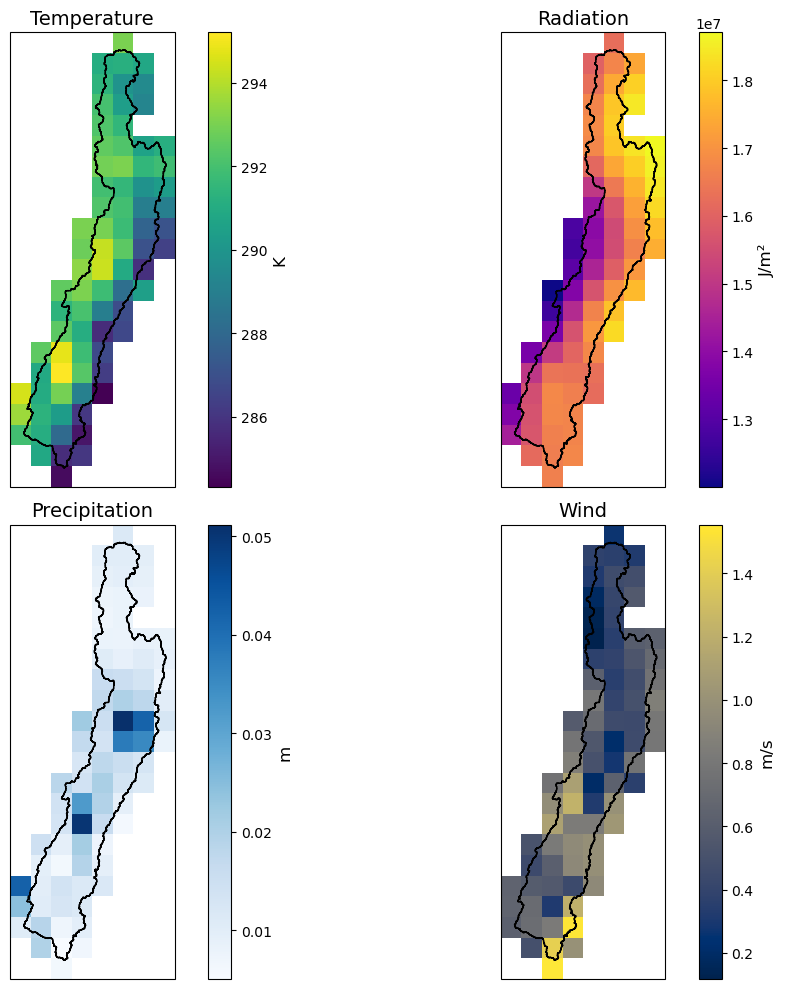

In [6]:
climate_data_1 = swim.extract_and_plot_climate_variables(
    nc_path="../data/climate/climate_data.nc",
    basin_shapefile="../data/terrain/Ituango_basin.shp",
    time_range=('1979-01-01', '2025-07-01'),
    var_mapping={
        't2m': 'Temperature',
        'ssrd': 'Radiation',
        'tp': 'Precipitation',
        'sfcWind': 'Wind'
    }
)

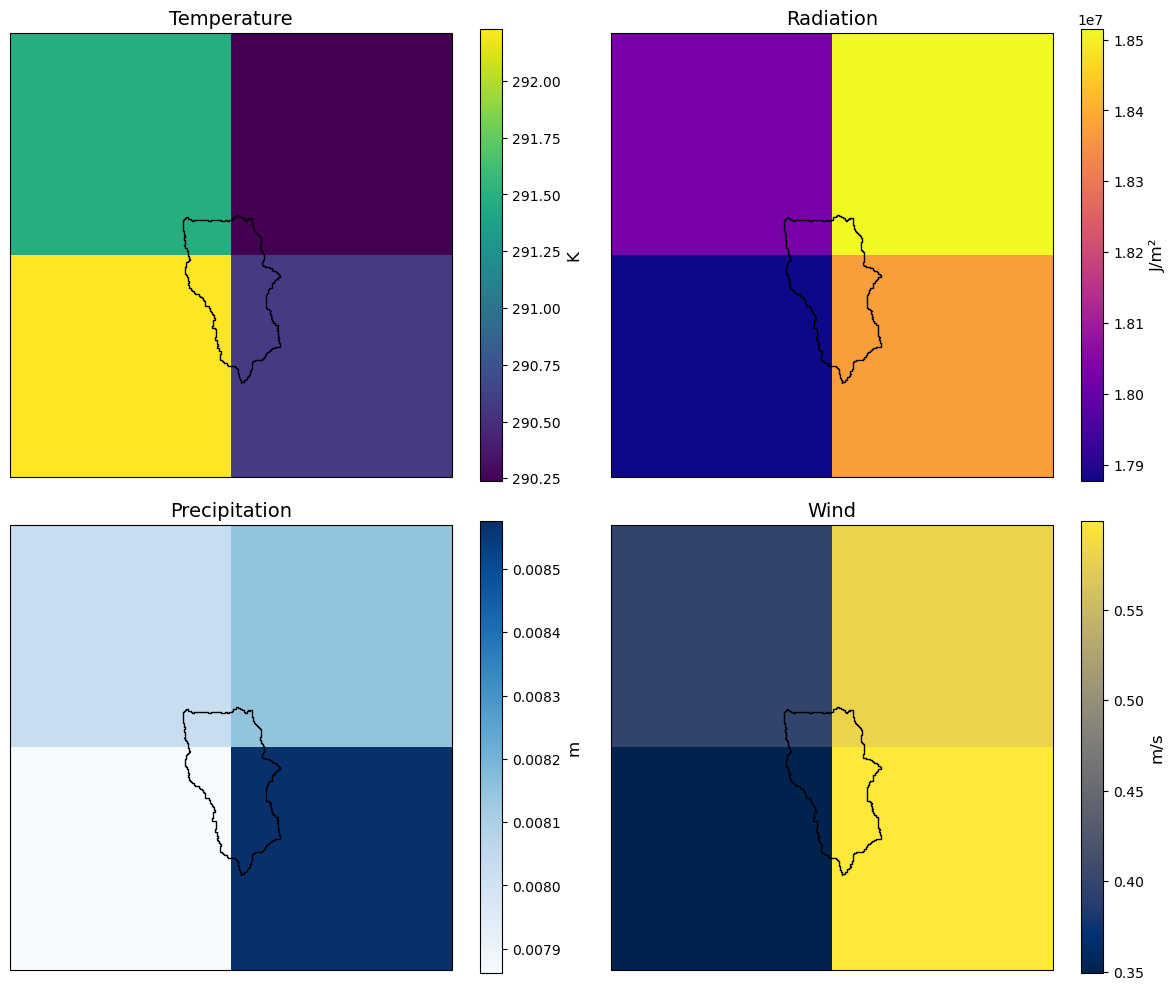

In [7]:
climate_data_2 = swim.extract_and_plot_climate_variables(
    nc_path="../data/climate/climate_data.nc",
    basin_shapefile="../data/terrain/Medellin_basin.shp",
    time_range=('1979-01-01', '2025-07-01'),
    var_mapping={
        't2m': 'Temperature',
        'ssrd': 'Radiation',
        'tp': 'Precipitation',
        'sfcWind': 'Wind'
    }
)

🔍 Training LinearRegression...
🔍 Training SVR...
🔍 Training DecisionTreeRegressor...
🔍 Training KNeighborsRegressor...
🔍 Training ElasticNet...
🔍 Training GradientBoostingRegressor...
🔍 Training AdaBoostRegressor...
🔍 Training MLPRegressor...
✅ Best model: SVR
R2       0.919898
NSE      0.911787
PBIAS   -0.395788
Name: 1, dtype: object


c:\Anaconda3\envs\SWIM_WaterBalance\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


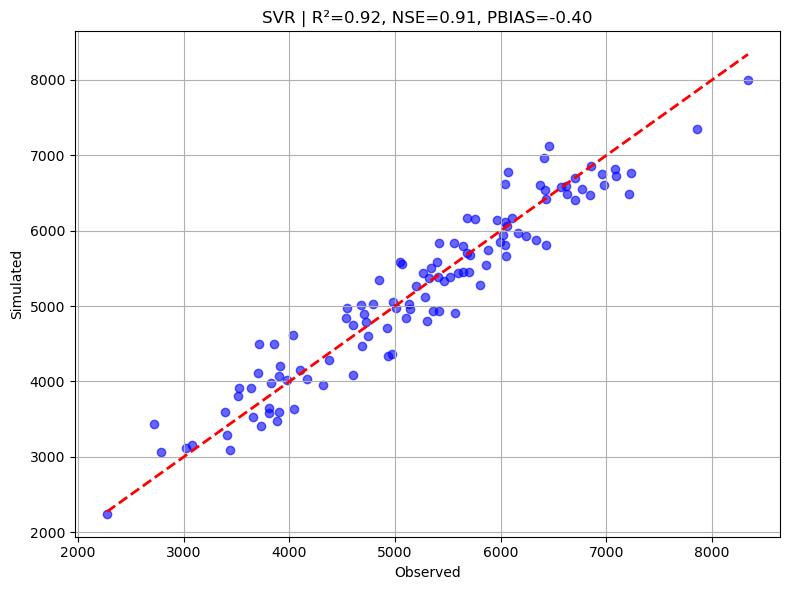

In [8]:
# Call the function with the appropriate data
best_model1, trained_model1, metrics_table1 = swim.build_flow_models_from_climate_data(
    climate_dataset=climate_data_1,
    discharge_series=monthly_q1,
    output_dir="./Modelos1",
    predictors=['tp', 't2m', 'ssrd', 'sfcWind'],  # You can include more if available
    apply_pca=True,
    pca_var_threshold=0.95
)

🔍 Training LinearRegression...
🔍 Training SVR...
🔍 Training DecisionTreeRegressor...
🔍 Training KNeighborsRegressor...
🔍 Training ElasticNet...
🔍 Training GradientBoostingRegressor...
🔍 Training AdaBoostRegressor...
🔍 Training MLPRegressor...
✅ Best model: SVR
R2       0.697502
NSE      0.572406
PBIAS    0.049746
Name: 1, dtype: object


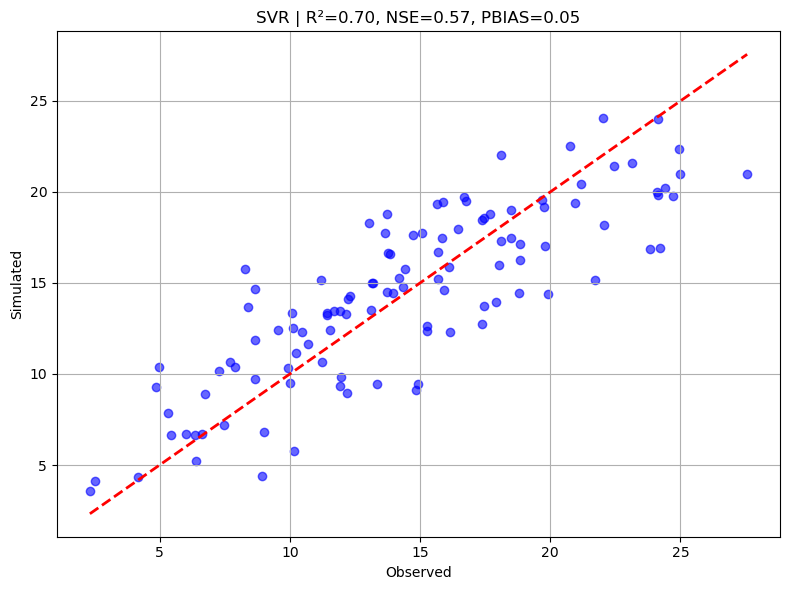

In [9]:
# Call the function with the appropriate data
best_model2, trained_model2, metrics_table2 = swim.build_flow_models_from_climate_data(
    climate_dataset=climate_data_2,
    discharge_series=monthly_q2,
    output_dir="./Modelos2",
    predictors=['tp', 't2m', 'ssrd', 'sfcWind'],  # You can include more if available
    apply_pca=True,
    pca_var_threshold=0.95
)

In [10]:
observed_series_1 = pd.Series(
    monthly_q1.values,
    index=pd.to_datetime(monthly_q1.valid_time.data),
    name="Observed"
)

observed_series_2 = pd.Series(
    monthly_q2.values,
    index=pd.to_datetime(monthly_q2.valid_time.data),
    name="Observed"
)

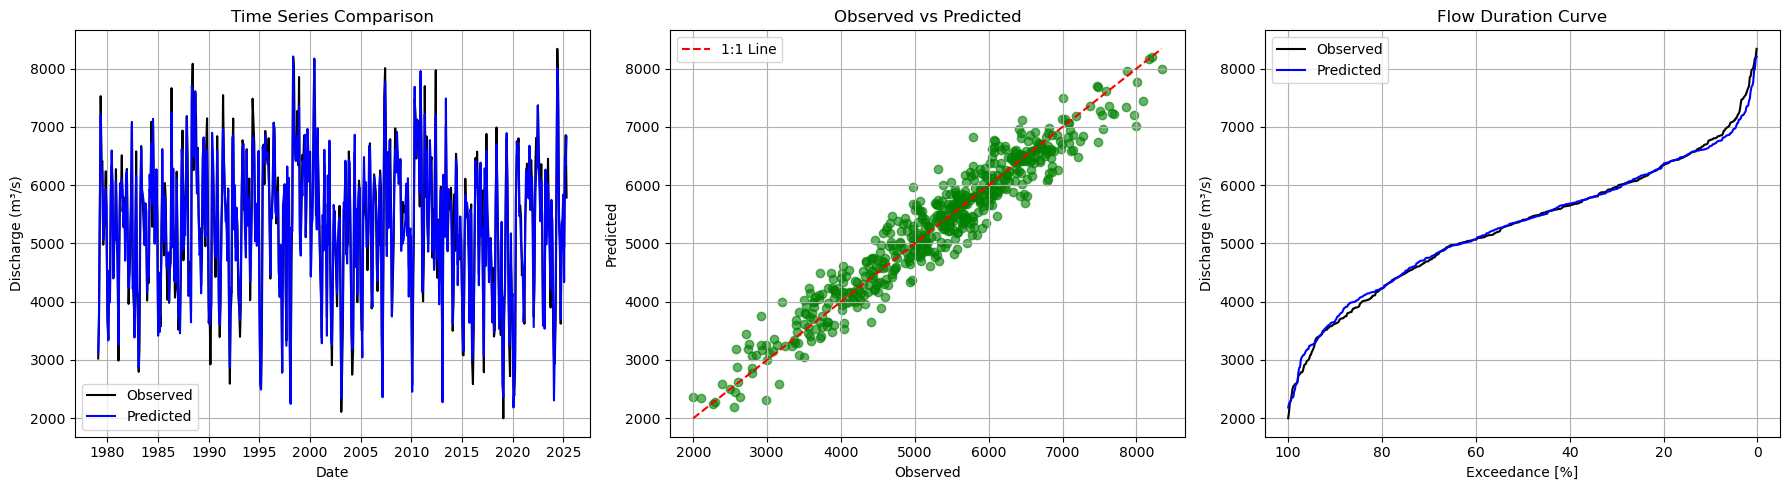

In [11]:
df_prediction_1 = swim.predict_discharge_from_climate(
    new_climate_dataset=climate_data_1,
    model_name="SVR",
    model_dir="./Modelos1",
    predictors=["tp", "t2m", "ssrd", "sfcWind"],
    observed_series=observed_series_1
)

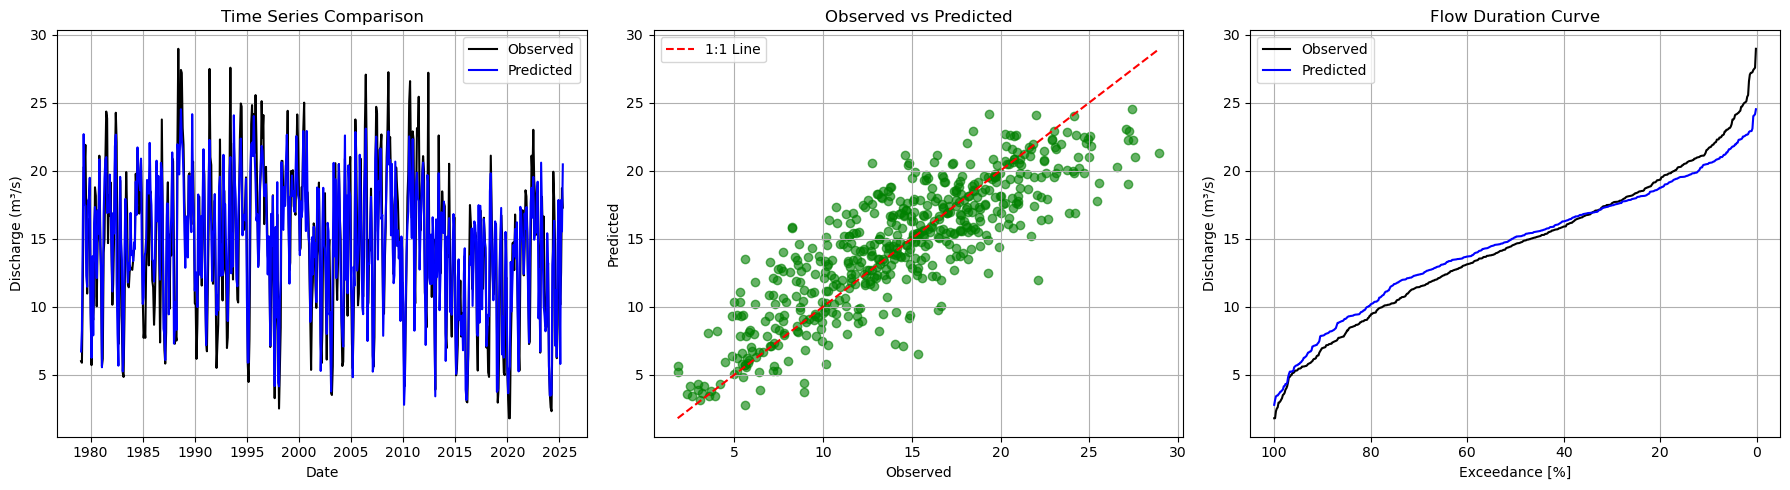

In [13]:
df_prediction_2 = swim.predict_discharge_from_climate(
    new_climate_dataset=climate_data_2,
    model_name="SVR",
    model_dir="./Modelos2",
    predictors=["tp", "t2m", "ssrd", "sfcWind"],
    observed_series=observed_series_2
)